Pymaceuticals Analysis
===

---
## Observations and Insights 

* The final tumor volume was lower on average for mice recieving Capomulin (40.68 mm3) and Ramicane (
40.21 mm3) treatment. 
* More mice recieving Capomulin and Ramicane treatment survived past timepoint 10 compared to those recieving other treatments. 
* Amoung mice recieving Capomulin treatment, final tumor volume was dependent on mouse weight (correlation coefficient: 0.84, p-value< 0.001). 



---

In [1]:
%matplotlib inline
%matplotlib notebook 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data =pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

no_of_mice = pd.DataFrame({
    "Mouse Metadata" : [mouse_metadata["Mouse ID"].count()], 
    "Study Dataset" : study_results["Mouse ID"].nunique(), 
    "Merged Dataset" : merged_data["Mouse ID"].nunique()})

no_of_mice


,Mouse Metadata,Study Dataset,Merged Dataset
0,249,249,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

QA_merged_data = pd.DataFrame({
    "Number of Records" : merged_data.groupby(
        ["Mouse ID", "Timepoint"])[
                "Timepoint"].count()})

duplicates = QA_merged_data.loc[QA_merged_data["Number of Records"] >1, :]

duplicates

Number of Records
Mouse ID Timepoint                   
g989     0                          2
         5                          2
         10                         2
         15                         2
         20                         2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = merged_data.loc[merged_data["Mouse ID"] == "g989", :]

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = merged_data.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep="first")

cleaned_data.loc[cleaned_data["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [6]:
# Checking the number of mice in the clean DataFrame.

no_of_mice_cleaned = pd.DataFrame({
    "Mouse Metadata (unique)" : [mouse_metadata["Mouse ID"].count()], 
    "Study Dataset (unique)" : study_results["Mouse ID"].nunique(), 
    "Merged Dataset (unique)" : merged_data["Mouse ID"].nunique(),
    "Merged Dataset (sum)" : merged_data["Mouse ID"].count(),
    "Cleaned Dataset (unique)" : cleaned_data["Mouse ID"].nunique(),
    "Cleaned Dataset (sum)" : cleaned_data["Mouse ID"].count()})

no_of_mice_cleaned

,Mouse Metadata (unique),Study Dataset (unique),Merged Dataset (unique),Merged Dataset (sum),Cleaned Dataset (unique),Cleaned Dataset (sum)
0,249,249,249,1893,249,1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_table = pd.DataFrame({
    "Mean" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 
    "Median" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 
    "Variance" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 
    "SEM" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

alt_summary_table = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

alt_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


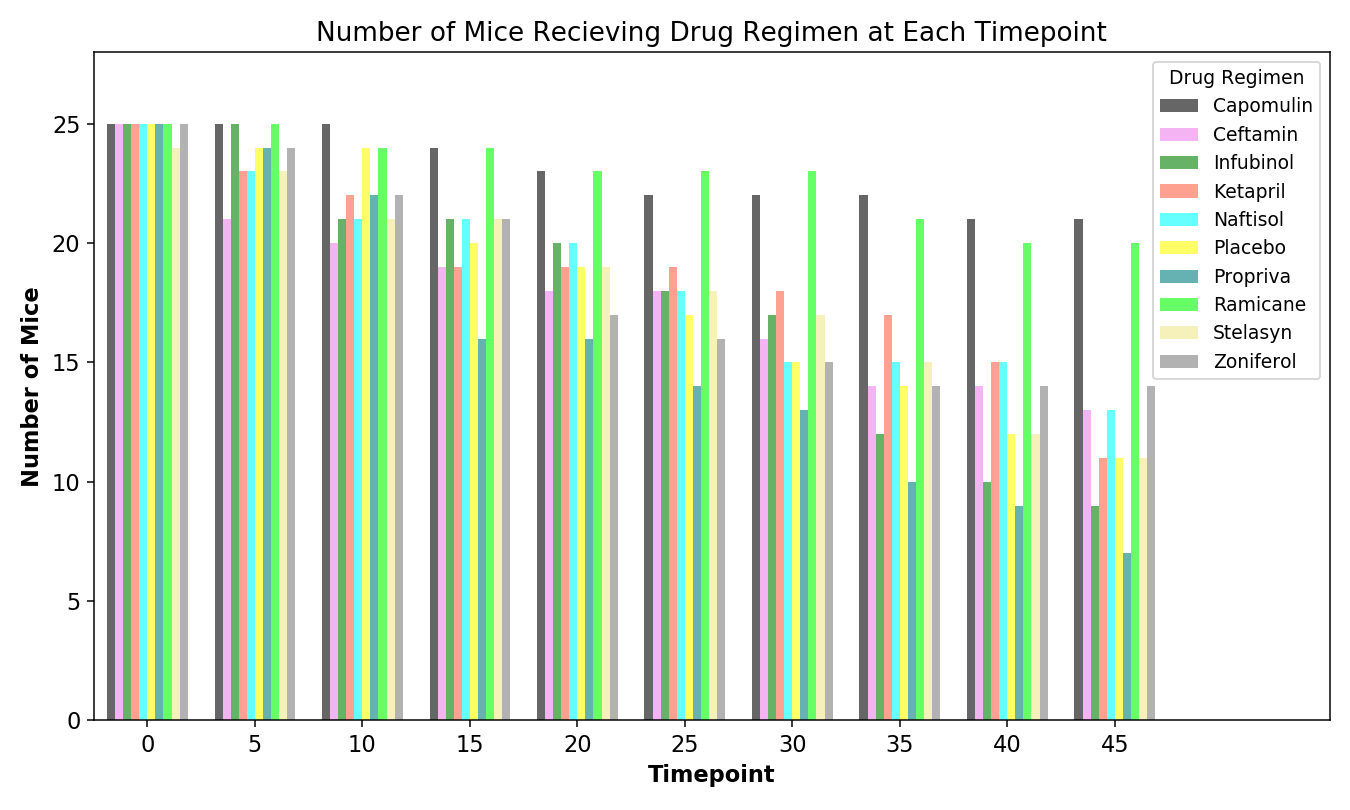

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
    
    #generate dataframe to plot
no_of_mice_per_drug_data = cleaned_data.groupby(
    ["Timepoint","Drug Regimen"])["Mouse ID"].count().unstack()

    #plot
    
colors =["black", "violet", "green", "tomato", "cyan", "yellow", "teal", "lime", "khaki", "gray"]

no_of_mice_per_drug_plot = no_of_mice_per_drug_data.plot(
                                    kind="bar",
                                    width=0.75,
                                    figsize=(10,6), 
                                    use_index =True,
                                    legend=True,
                                    fontsize = 12,
                                    rot=0,
                                    color = colors,
                                    alpha=0.6)
    
    #format axes
no_of_mice_per_drug_plot.set_xlim(-.5, len(
    cleaned_data["Timepoint"].unique()) + 1) 
no_of_mice_per_drug_plot.set_ylim(0, 
                                  max(cleaned_data.groupby(
                                      ["Timepoint","Drug Regimen"])["Mouse ID"].count())+3)

#labelling
no_of_mice_per_drug_plot.set_title("Number of Mice Recieving Drug Regimen at Each Timepoint", fontsize=14)
no_of_mice_per_drug_plot.set_xlabel("Timepoint", fontsize=12, fontweight ='bold')
no_of_mice_per_drug_plot.set_ylabel("Number of Mice", fontsize=12, fontweight ='bold')

#show results
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


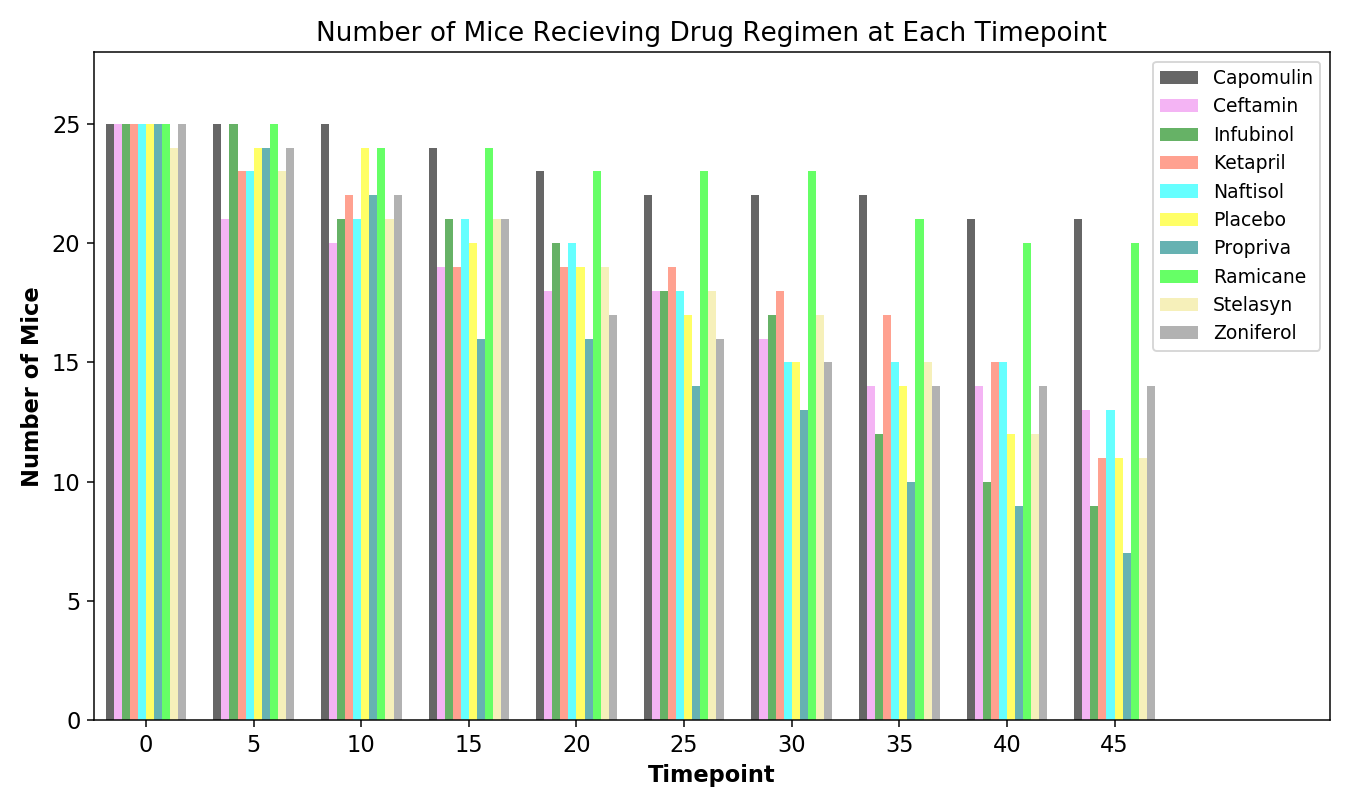

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

no_of_mice_per_drug = cleaned_data.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count()

# Setup 

width = 0.75
    #axes formatting
    
categories = np.arange(len(cleaned_data.groupby("Drug Regimen")["Timepoint"].unique()))
tick_locations = [10*value + 4.5*width for value in categories]          
labels = [label for label in cleaned_data["Timepoint"].unique()] 
    
    #bar formatting
    
fig, ax = plt.subplots(figsize=(10,6))
colors =["black", "violet", "green", "tomato", "cyan", "yellow", "teal", "lime", "khaki", "gray"]

regimens =[treatment for treatment in cleaned_data["Drug Regimen"].unique()]
regimens.sort()

    #title and axis titles
    
plt.ylabel("Number of Mice", fontsize=12, fontweight ='bold')
plt.xlabel("Timepoint", fontsize=12, fontweight ='bold')
plt.title("Number of Mice Recieving Drug Regimen at Each Timepoint", fontsize=14)

#loop in findings categories

list_tracker=0
width_tracker=0

for drug in regimens:
  
    plt.bar([10*value + width*width_tracker for value in categories],
        no_of_mice_per_drug[drug], 
        width, 
        color= colors[list_tracker], 
        alpha=0.6, 
        label=regimens[list_tracker]) 
    
    list_tracker+=1
    width_tracker+=1

# Set the labels for the x ticks
plt.xticks(tick_locations, labels,  fontsize=12) 
plt.yticks(fontsize=12)

#fixing asthetics 
plt.xlim(-1.5, max(tick_locations)+20)
plt.ylim(0, max(cleaned_data.groupby(["Timepoint","Drug Regimen"])["Mouse ID"].count())+3)
plt.legend(regimens, loc='upper right')

#plot
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


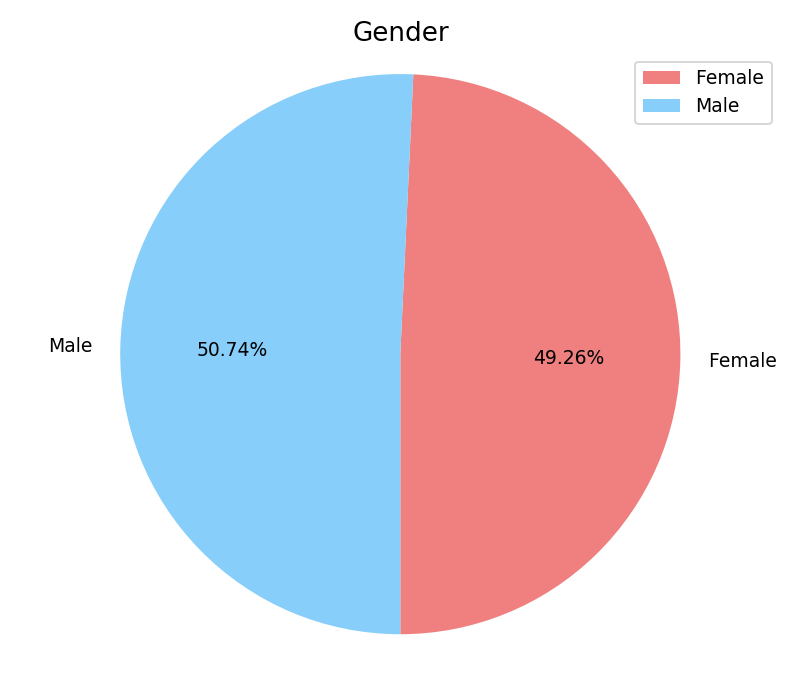

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
                                           
gender_data = cleaned_data.groupby("Sex")["Mouse ID"].count()  

colors = ["lightcoral", "lightskyblue"]

gender_data_plot = gender_data.plot(kind="pie", 
                                    figsize=(6,5),
                                    colors = colors,
                                    autopct="%1.2f%%", 
                                    startangle=-90, 
                                    radius=0.75, 
                                    legend=True)
                                
#formatting
gender_data_plot.set_title("Gender", fontsize=14)
gender_data_plot.set_ylabel("")

# equalize axes
plt.axis("equal")

#plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


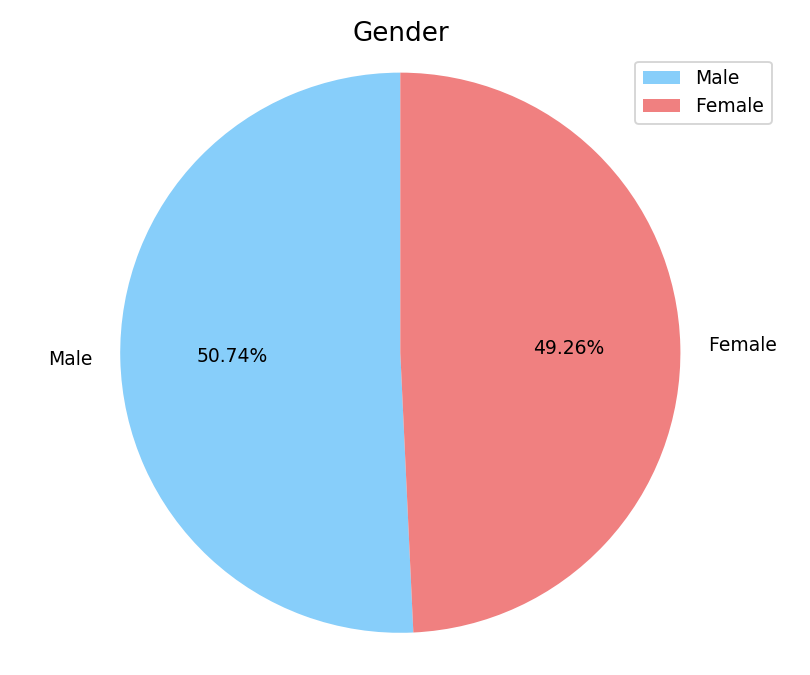

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#setup 

values = np.array(cleaned_data["Sex"].value_counts()).tolist()
categories_gender = cleaned_data["Sex"].unique()
colors = ["lightskyblue","lightcoral"]

#set fig size
fig = plt.figure(figsize=(6,5))

#plot bar graph
plt.pie(values, 
        labels=categories_gender,
        colors=colors,
        autopct="%1.2f%%", 
        startangle=90,
        radius=0.75)

#formatting
plt.title("Gender", fontsize=14)
plt.legend(loc="upper right")
                 
# equalize axes
plt.axis("equal")

#display
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_id_strat = cleaned_data.groupby(["Mouse ID"])

last_timepoint = mouse_id_strat["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol_at_lasttimept = pd.merge(
    last_timepoint, cleaned_data, how="left", on=["Mouse ID", "Timepoint"])

In [22]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

of_interest = tumor_vol_at_lasttimept.loc[
                    tumor_vol_at_lasttimept["Drug Regimen"].isin(drugs_of_interest), :]

# Create empty list to fill with tumor vol data (for plotting)

categories = np.arange(of_interest["Tumor Volume (mm3)"].count())
categories_list = [category for category in categories]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes +add subset 

grp_of_interest = of_interest.groupby("Drug Regimen")
   
    # Determine outliers using upper and lower bounds

        #determine lower Q and Upper Q per drug treatment

quantiles = grp_of_interest["Tumor Volume (mm3)"].quantile([.25,.5,.75])

quantile_list = quantiles.unstack(level=1)

quantile_list.rename(columns={0.25: "Lower Q", 0.5 : "Median", 0.75 : "Upper Q"} ,inplace=True)
      
        #calculate IQR, Lower Bound and Upper Bound
    
quantile_list["IQR"] = quantile_list["Upper Q"] - quantile_list["Lower Q"]

quantile_list["Lower Bound"] = quantile_list["Lower Q"] - quantile_list["IQR"]*1.5

quantile_list["Upper Bound"] = quantile_list["Upper Q"] + quantile_list["IQR"]*1.5

    #Identify outliers per treatment using a loop 
    #(1. create series, 2. identify outliers, 3. create dataframe and set index, 4. merge back)

        #create dataframe with pseudo data that each loop can be merged back on
        
outlier_holder = pd.DataFrame({"Drug Regimen" : ["treatment"], 
                           "No. of Outliers" : 6,
                           "Outlier - Mouse ID" : "holder",
                           "Outlier - Value" : 6})
outlier_holder.set_index("Drug Regimen", inplace=True)

        #determine findings per treatment then merge into dataframe
    
for treatment in drugs_of_interest: 
    
    data = of_interest.loc[of_interest["Drug Regimen"] == treatment]
    
    outliers = data.loc[
       (data["Tumor Volume (mm3)"] > quantile_list.loc[treatment, "Upper Bound"]) |
       (data["Tumor Volume (mm3)"] < quantile_list.loc[treatment, "Lower Bound"]), :]
    
    outlier_df = pd.DataFrame({"Drug Regimen" : treatment, 
                           "No. of Outliers" : outliers["Mouse ID"].count(),
                           "Outlier - Mouse ID" : outliers["Mouse ID"].unique(),
                           "Outlier - Value" : outliers["Tumor Volume (mm3)"].unique()})
    
    outlier_df.set_index("Drug Regimen", inplace=True)
    outlier_holder = pd.concat([outlier_holder, outlier_df])

    #combine with original quantile dataframe 
    
outlier_findings = pd.merge(quantile_list, outlier_holder, on="Drug Regimen", how="left")

    #display findings
    
outlier_findings

,Lower Q,Median,Upper Q,IQR,Lower Bound,Upper Bound,No. of Outliers,Outlier - Mouse ID,Outlier - Value
Drug Regimen,,,,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,NaN,NaN,NaN
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,NaN,NaN,NaN
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,1.0,c326,36.321346
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,NaN,NaN,NaN


<IPython.core.display.Javascript object>


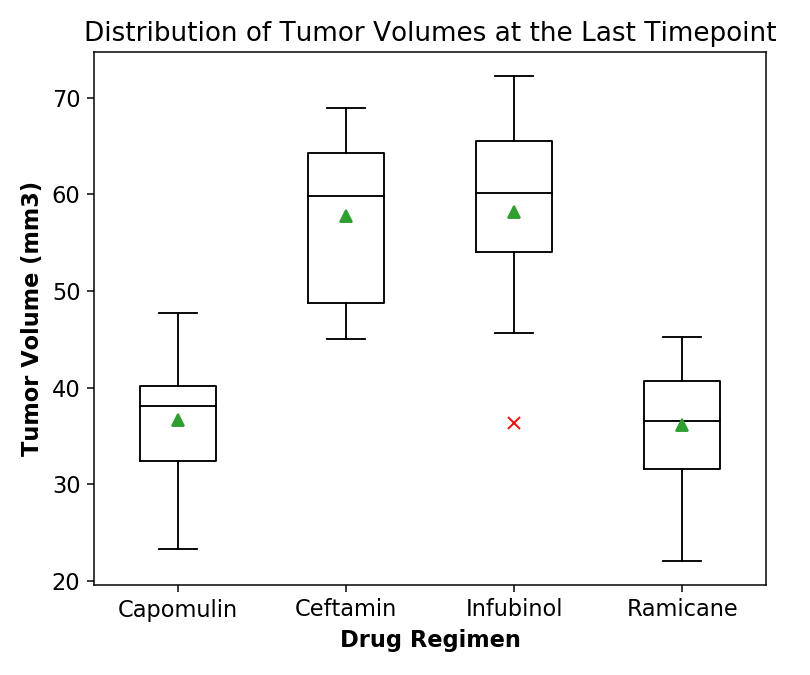

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier_formatting = dict(markeredgecolor='r', marker='x')

final_tumor_size = of_interest.boxplot(
                                        by = "Drug Regimen", 
                                        column =["Tumor Volume (mm3)"],
                                        grid=False,
                                        figsize=(6, 5), 
                                        fontsize=12, 
                                        color="black",
                                        showmeans=True,
                                        flierprops=outlier_formatting)

#formatting
final_tumor_size.set_title("Distribution of Tumor Volumes at the Last Timepoint", fontsize=14)

final_tumor_size.set_ylabel(
    "Tumor Volume (mm3)", 
    fontsize=12,
    fontweight ='bold')

final_tumor_size.set_xlabel(
    "Drug Regimen", 
    fontsize=12,
    fontweight ='bold')

plt.suptitle('')

#display
plt.tight_layout()
plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


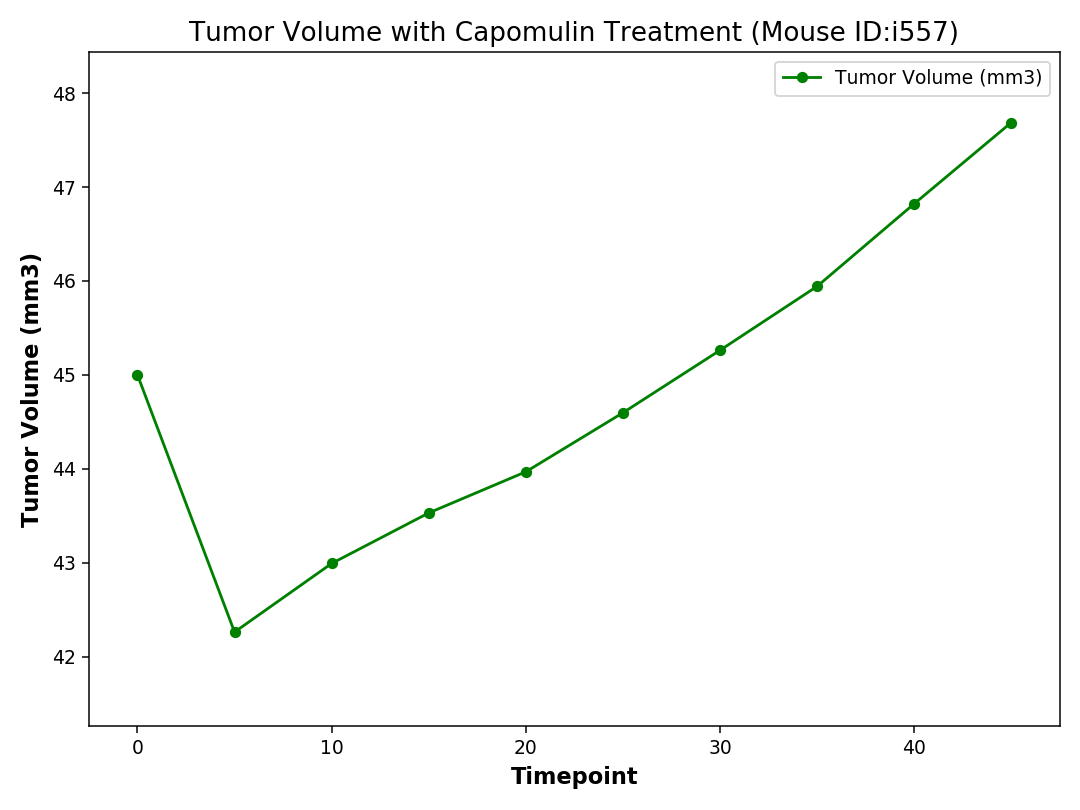

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#select for data of interest
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", :]
mouse_i557_data =capomulin_data.loc[capomulin_data["Mouse ID"] == "i557", :]

#plot findings
mouse_i557_findings = mouse_i557_data.loc[mouse_i557_data["Mouse ID"] == "i557", :].plot.line(
    x="Timepoint", 
    y="Tumor Volume (mm3)",
    legend=False, 
    color ="green",
    marker='.', 
    markersize=10, 
    figsize=(8, 6))

#Formatting
mouse_i557_findings.set_title("Tumor Volume with Capomulin Treatment (Mouse ID:i557)", fontsize=14)
mouse_i557_findings.set_xlabel("Timepoint", fontsize=12, fontweight ='bold')
mouse_i557_findings.set_ylabel("Tumor Volume (mm3)", fontsize=12, fontweight ='bold')

mouse_i557_findings.set_xlim(
    mouse_i557_data["Timepoint"].min() - 2.5, 
    mouse_i557_data["Timepoint"].max() + 2.5) 

mouse_i557_findings.set_ylim(
    mouse_i557_data["Tumor Volume (mm3)"].min() - 1,
    mouse_i557_data["Tumor Volume (mm3)"].max() + 0.75)

plt.legend()
    
#display
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


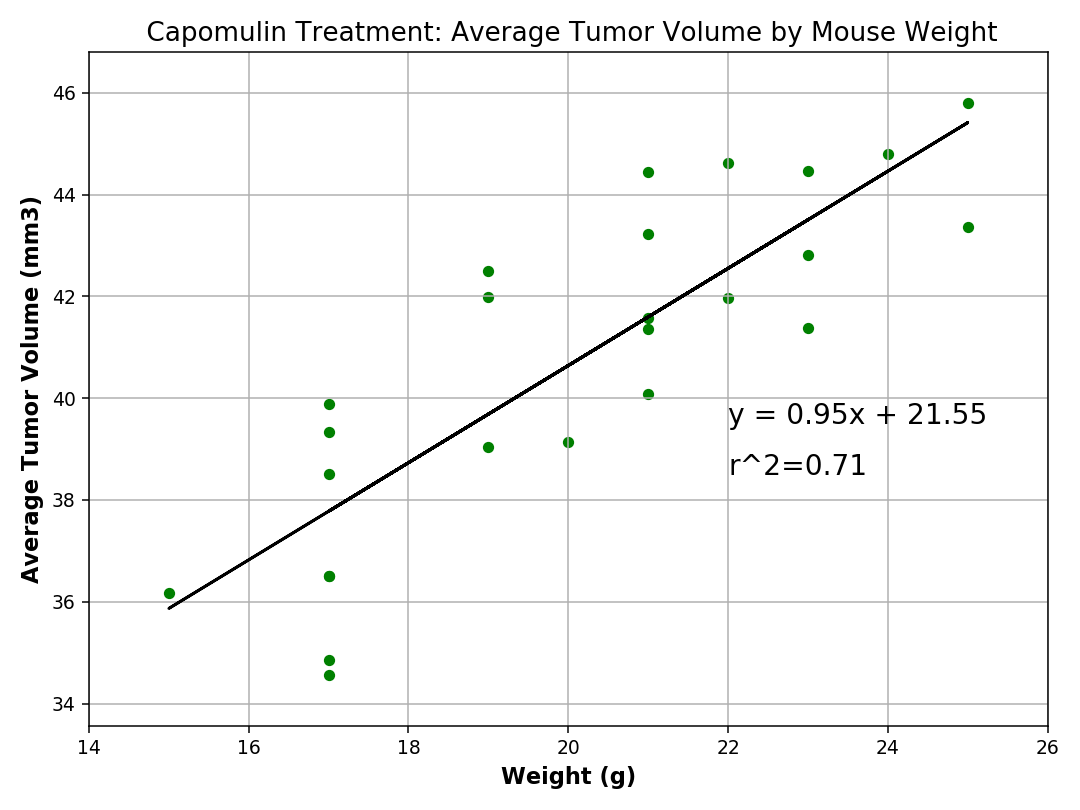

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#select for data of interest
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", :]

capomulin_data_strat_by_ID = pd.DataFrame({
    "Weight" : capomulin_data.groupby("Mouse ID")["Weight (g)"].mean(), 
    "Tumor Volume Mean" : capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()})

#plot findings
capomulin_findings = capomulin_data_strat_by_ID.plot.scatter(
    x = "Weight",
    y = "Tumor Volume Mean", 
    marker='.',
    s = 100,
    c ="green",
    figsize=(8, 6))

#Formatting
capomulin_findings.set_title(" Capomulin Treatment: Average Tumor Volume by Mouse Weight", fontsize=14)
capomulin_findings.set_xlabel("Weight (g)", fontsize=12, fontweight ='bold')
capomulin_findings.set_ylabel("Average Tumor Volume (mm3)", fontsize=12, fontweight ='bold')

plt.xlim(min(
    capomulin_data_strat_by_ID["Weight"]) -1, max(capomulin_data_strat_by_ID["Weight"]) +1)
plt.ylim(
    min(capomulin_data_strat_by_ID["Tumor Volume Mean"]) -1,
    max(capomulin_data_strat_by_ID["Tumor Volume Mean"]) +1)
plt.grid()

#display
plt.show()
plt.tight_layout()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# linear regression 
x = capomulin_data_strat_by_ID["Weight"]
y = capomulin_data_strat_by_ID["Tumor Volume Mean"]
ms_slope, ms_int, ms_r, ms_p, ms_std_err = st.linregress(x, y)
                                                                               
# Equation of the linear regression 

y_predicted = ms_slope * x + ms_int
eq_plot = "y = " + str(round(ms_slope, 2)) + "x + " + str(round(ms_int, 2))

#calculated r-squared
r_squared= "r^2=" + str(round(ms_r**2,2))

#display findings
print(f"Linear Equation: Mean Tumor Volume = {round(ms_slope, 2)} x Mouse Weight + {round(ms_int,2)}")
print(f"Correlation Coefficient: {round(ms_r,2)}")
print(f"P-value: {ms_p}")
print(f"Standard Error: {ms_std_err}")

#plot linear model
plt.plot(capomulin_data.groupby("Mouse ID")["Weight (g)"].mean(),y_predicted,"k-")
plt.annotate(eq_plot,(22,39.5),fontsize=15,color="k")
plt.annotate(r_squared,(22,38.5),fontsize=15,color="k")

Linear Equation: Mean Tumor Volume = 0.95 x Mouse Weight + 21.55
Correlation Coefficient: 0.84
P-value: 1.3225722434712642e-07
Standard Error: 0.1275435903320134


Text(22, 38.5, 'r^2=0.71')